In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
dataset_dir = os.path.join(os.path.dirname(os.path.dirname(os.path.abspath(''))), 'datasets')
llamados_v2= pd.read_excel(os.path.join(dataset_dir, 'xlsx/llamados_v2.xlsx'))

### Faltantes por columna

In [ ]:
llamados_v2.isnull().sum()

### Descripciones

In [5]:
llamados_v2.describe(include=[object])

,llamado_provincia,llamante_genero,llamante_vinculo,caso_judicializado,hecho_lugar,victima_a_resguardo,victima_genero,victima_nacionalidad,victima_vinculo_agresor,victima_discapacidad,...,ofv_intento_privacion_libertad,ofv_privacion_libertad,ofv_uso_arma_blanca,ofv_uso_arma_fuego,ofv_enganio_seduccion,ofv_intento_matar,ofv_uso_animal_victimizar,ofv_grooming,ofv_otra_forma_violencia,ofv_no_sabe_no_contesta
count,19143,19143,19143,19143,19143,19143,19143,19143,19143,19143,...,19143,19143,19143,19143,19143,19143,19143,19143,19143,19143
unique,25,4,16,3,17,2,4,9,15,3,...,2,2,2,2,2,2,2,2,2,2
top,CABA,Femenino,Comisaría,NO,NS/NC,SI,Femenino,Argentina,"Conocido no familiar (Amigo, vecino, entre otros)",NS/NC,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,SI
freq,7083,13130,4769,8950,5675,17840,14869,15475,3790,10297,...,19106,19051,19112,19120,18880,19141,19137,18835,17802,10932


In [7]:
llamados_v2.describe(exclude=[object])

,llamado_fecha_hora,llamante_edad,victima_edad
count,19143,10563.000000,17263.000000
mean,2019-08-04 12:53:58.129760256,36.250118,17.167294
min,2016-11-19 12:46:38,3.000000,0.000000
25%,2018-09-17 14:03:04.500000,29.000000,10.000000
50%,2019-08-26 17:15:00,35.000000,14.000000
75%,2020-09-25 18:25:00,42.000000,21.000000
max,2021-07-31 23:45:00,99.000000,99.000000
std,NaN,11.417725,11.910669


### Llamados por provincia

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/3401335010.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_provincia = sns.barplot(
/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/3401335010.py:2: UserWarning: 
The palette list has fewer values (9) than needed (25) and will cycle, which may produce an uninterpretable plot.
  plot_provincia = sns.barplot(


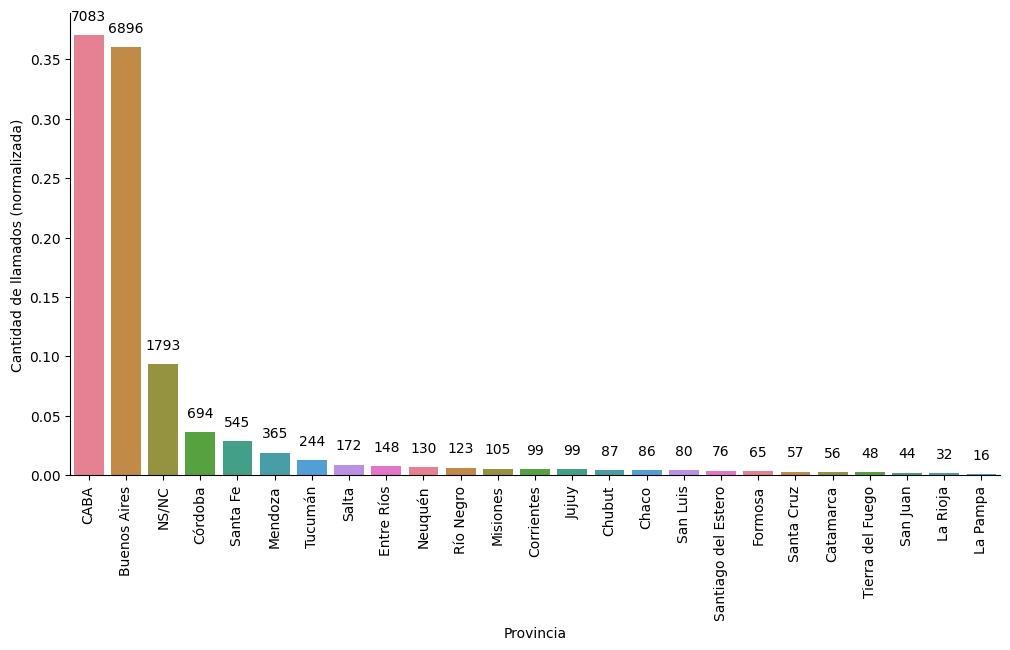

In [18]:
plt.figure(figsize=(12, 6))
plot_provincia = sns.barplot(
    x=llamados_v2.llamado_provincia.value_counts(normalize=True).index,
    y=llamados_v2.llamado_provincia.value_counts(normalize=True).values,
    palette=sns.color_palette("husl", 9)
)

# Anotación de las barras
for i, count in enumerate(llamados_v2.llamado_provincia.value_counts().values):
    plot_provincia.text(i, llamados_v2.llamado_provincia.value_counts(normalize=True).values[i] + 0.01, 
                           str(count), ha='center', va='bottom')


plot_provincia.set(xlabel='Provincia', ylabel='Cantidad de llamados (normalizada)')

plt.xticks(rotation=90)
sns.despine()
plt.show()

In [19]:
llamados_v2.shape

(19143, 53)

In [26]:
545/19143*100

2.846993679151648

In [28]:
povincia_counts = llamados_v2['llamado_provincia'].value_counts(normalize=True)*100
povincia_counts

llamado_provincia
CABA                   37.000470
Buenos Aires           36.023612
NS/NC                   9.366348
Córdoba                 3.625346
Santa Fe                2.846994
Mendoza                 1.906702
Tucumán                 1.274617
Salta                   0.898501
Entre Ríos              0.773129
Neuquén                 0.679099
Río Negro               0.642533
Misiones                0.548503
Corrientes              0.517160
Jujuy                   0.517160
Chubut                  0.454474
Chaco                   0.449250
San Luis                0.417907
Santiago del Estero     0.397012
Formosa                 0.339550
Santa Cruz              0.297759
Catamarca               0.292535
Tierra del Fuego        0.250744
San Juan                0.229849
La Rioja                0.167163
La Pampa                0.083581
Name: proportion, dtype: float64

### Cantidad de denuncias por género

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/2952496940.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_genero = sns.barplot(
/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/2952496940.py:2: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  plot_genero = sns.barplot(


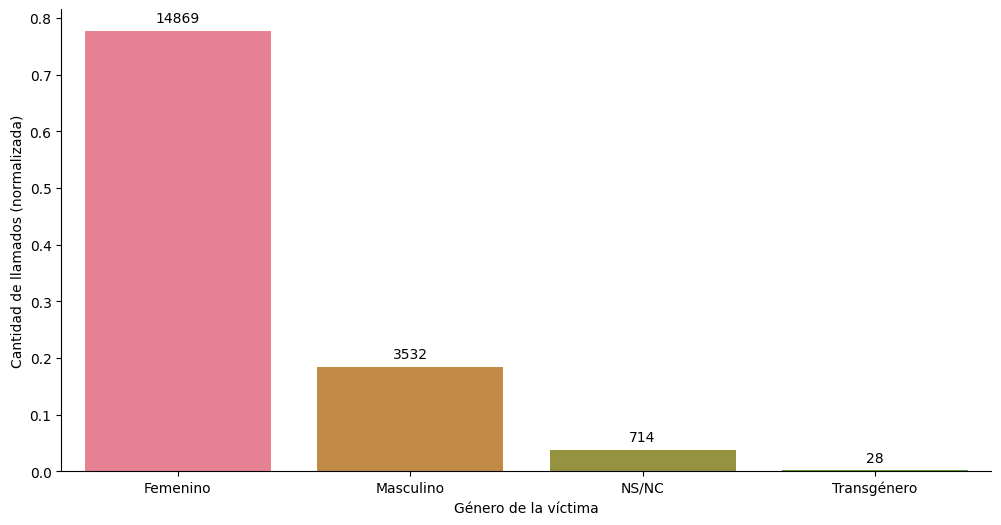

In [15]:
plt.figure(figsize=(12, 6))
plot_genero = sns.barplot(
    x=llamados_v2.victima_genero.value_counts(normalize=True).index,
    y=llamados_v2.victima_genero.value_counts(normalize=True).values,
    palette=sns.color_palette("husl", 9)
)

# Anotación de las barras
for i, count in enumerate(llamados_v2.victima_genero.value_counts().values):
    plot_genero.text(i, llamados_v2.victima_genero.value_counts(normalize=True).values[i] + 0.01, 
                           str(count), ha='center', va='bottom')


plot_genero.set(xlabel='Género de la víctima', ylabel='Cantidad de llamados (normalizada)')

plt.xticks(rotation=0)
sns.despine()
plt.show()

### Vínculos agresor-víctima

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_22313/4094474149.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_vinculo_agresor= sns.catplot(x="victima_vinculo_agresor", kind="count", data=llamados_v2, height=6, aspect=2, order=llamados_v2.victima_vinculo_agresor.value_counts().index, palette=sns.color_palette("husl", 15))


<function matplotlib.pyplot.show(close=None, block=None)>

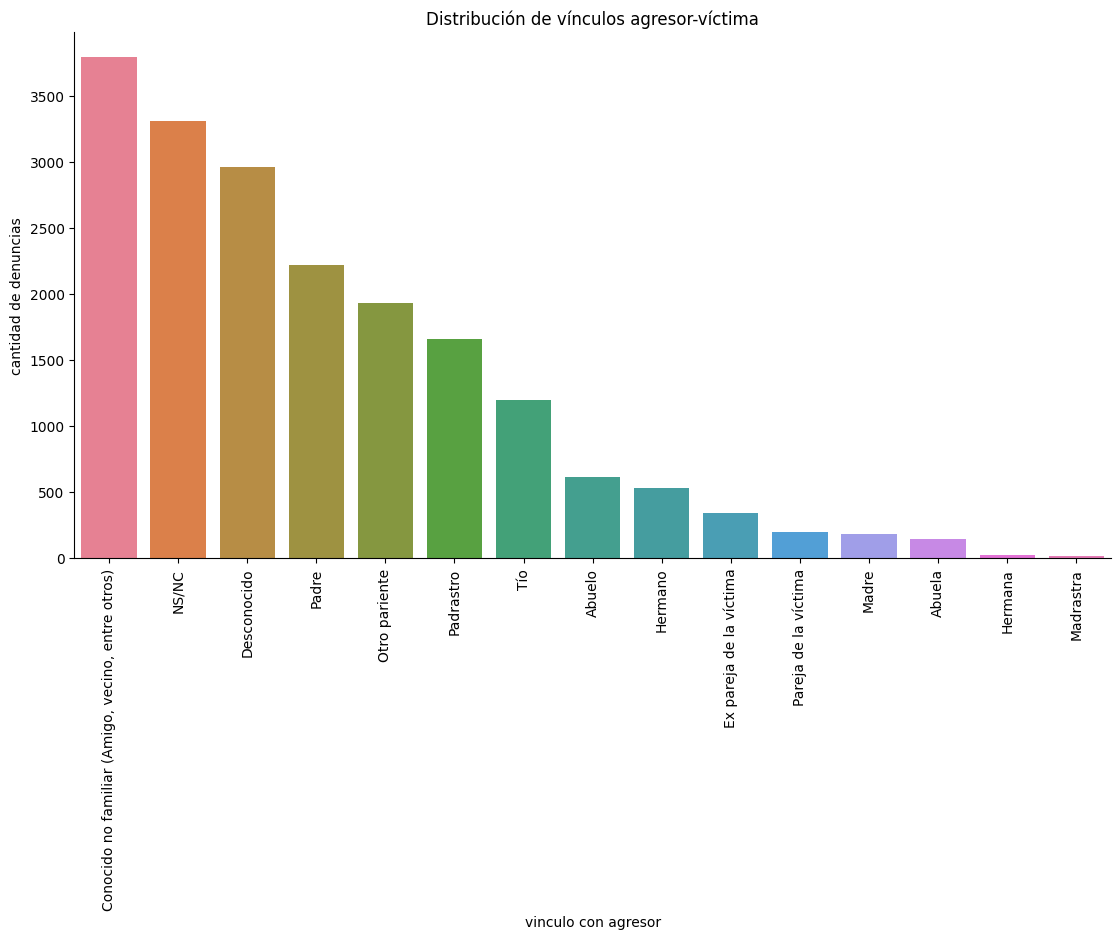

In [37]:
plot_vinculo_agresor= sns.catplot(x="victima_vinculo_agresor", kind="count", data=llamados_v2, height=6, aspect=2, order=llamados_v2.victima_vinculo_agresor.value_counts().index, palette=sns.color_palette("husl", 15))
plot_vinculo_agresor.set(xlabel='vinculo con agresor', ylabel='cantidad de denuncias')
plt.title("Distribución de vínculos agresor-víctima") 
plt.xticks(rotation=90)
plt.show

In [25]:
vinculo_agresor_counts = llamados_v2['victima_vinculo_agresor'].value_counts(normalize=True)*100
vinculo_agresor_counts

victima_vinculo_agresor
Conocido no familiar (Amigo, vecino, entre otros)    19.798360
NS/NC                                                17.280468
Desconocido                                          15.457347
Padre                                                11.591705
Otro pariente                                        10.097686
Padrastro                                             8.661129
Tío                                                   6.263386
Abuelo                                                3.238782
Hermano                                               2.779084
Ex pareja de la víctima                               1.791778
Pareja de la víctima                                  1.044768
Madre                                                 0.976858
Abuela                                                0.762681
Hermana                                               0.151491
Madrastra                                             0.104477
Name: proportion, dtype: float6

### Vínculos denunciante-víctima

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_22313/2293105514.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_vinculo_llamante = sns.catplot(x="llamante_vinculo", kind="count", data=llamados_v2, height=6, aspect=2, order=llamados_v2.llamante_vinculo.value_counts().index, palette=sns.color_palette("husl", 16))


<function matplotlib.pyplot.show(close=None, block=None)>

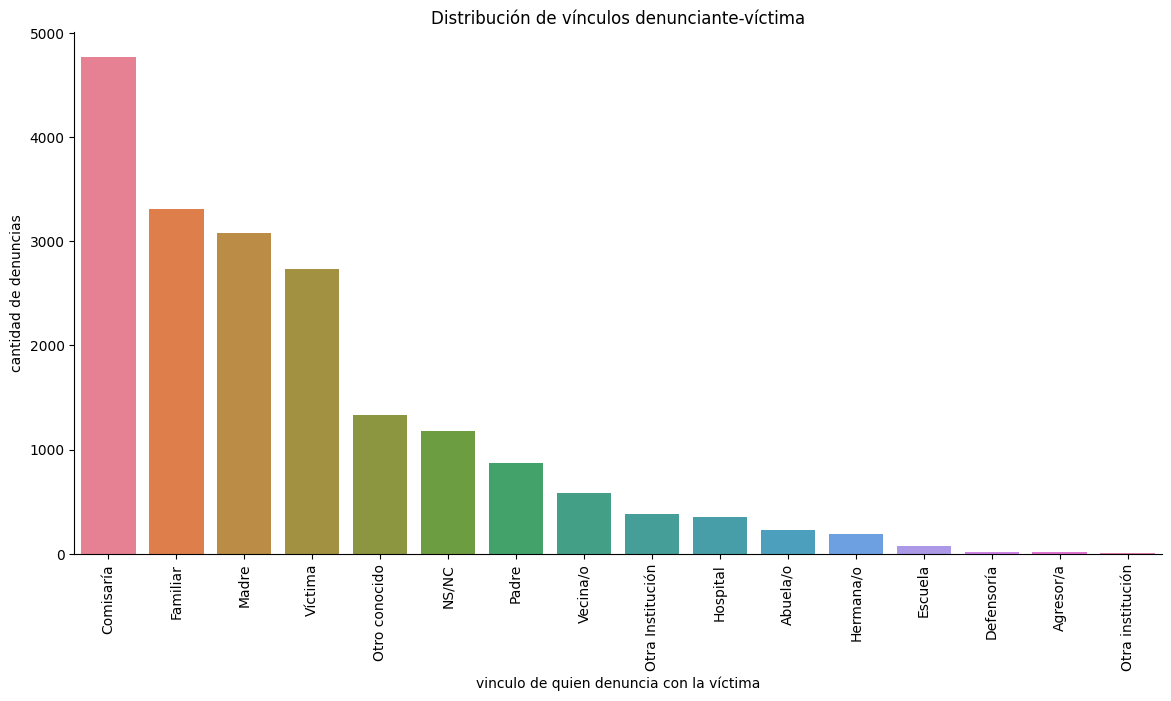

In [38]:
plot_vinculo_llamante = sns.catplot(x="llamante_vinculo", kind="count", data=llamados_v2, height=6, aspect=2, order=llamados_v2.llamante_vinculo.value_counts().index, palette=sns.color_palette("husl", 16))
plot_vinculo_llamante.set(xlabel='vinculo de quien denuncia con la víctima', ylabel='cantidad de denuncias')
plt.title("Distribución de vínculos denunciante-víctima") 
plt.xticks(rotation=90)
plt.show

In [27]:
llamante_vinculo_counts = round(llamados_v2['llamante_vinculo'].value_counts(normalize=True)*100,2)
llamante_vinculo_counts

llamante_vinculo
Comisaría           24.91
Familiar            17.28
Madre               16.09
Víctima             14.28
Otro conocido        6.95
NS/NC                6.17
Padre                4.54
Vecina/o             3.05
Otra Institución     2.00
Hospital             1.86
Abuela/o             1.20
Hermana/o            1.01
Escuela              0.42
Defensoría           0.10
Agresor/a            0.09
Otra institución     0.04
Name: proportion, dtype: float64

### Lugares de los hechos

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/2625663352.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_hecho_lugar = sns.barplot(
/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/2625663352.py:2: UserWarning: 
The palette list has fewer values (9) than needed (17) and will cycle, which may produce an uninterpretable plot.
  plot_hecho_lugar = sns.barplot(


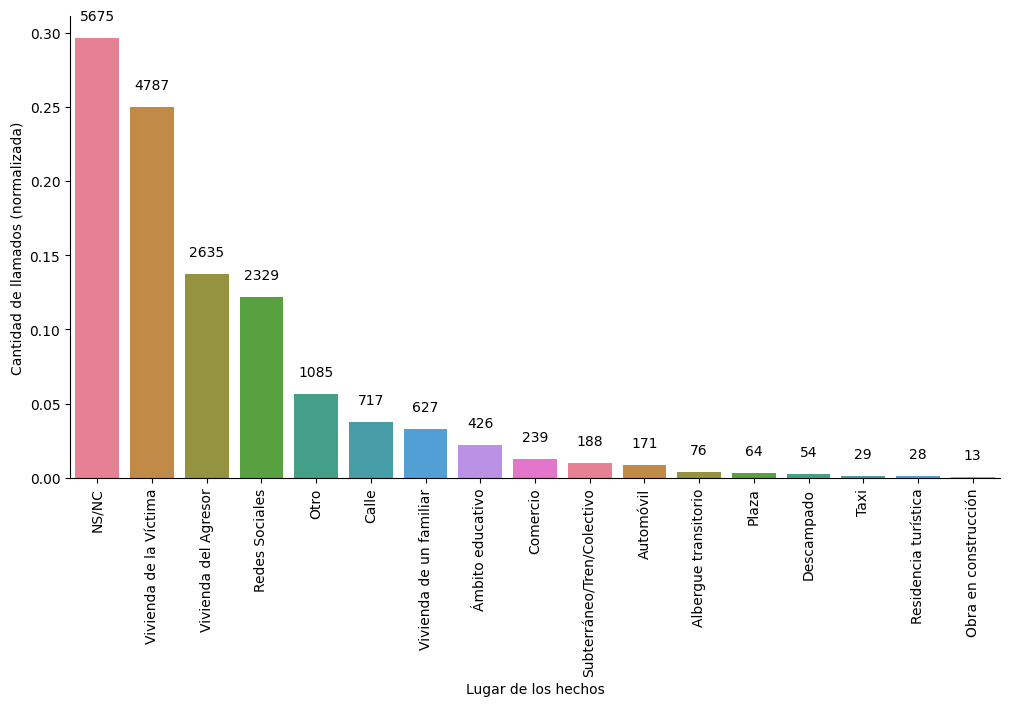

In [27]:
plt.figure(figsize=(12, 6))
plot_hecho_lugar = sns.barplot(
    x=llamados_v2.hecho_lugar.value_counts(normalize=True).index,
    y=llamados_v2.hecho_lugar.value_counts(normalize=True).values,
    palette=sns.color_palette("husl", 9)
)

# Anotación de las barras
for i, count in enumerate(llamados_v2.hecho_lugar.value_counts().values):
    plot_hecho_lugar.text(i, llamados_v2.hecho_lugar.value_counts(normalize=True).values[i] + 0.01, 
                           str(count), ha='center', va='bottom')


plot_hecho_lugar.set(xlabel='Lugar de los hechos', ylabel='Cantidad de llamados (normalizada)')

plt.xticks(rotation=90)
sns.despine()
plt.show()

In [24]:
hecho_lugar_counts = llamados_v2['hecho_lugar'].value_counts(normalize=True)*100
hecho_lugar_counts



hecho_lugar
NS/NC                         29.645301
Vivienda de la Víctima        25.006530
Vivienda del Agresor          13.764823
Redes Sociales                12.166327
Otro                           5.667868
Calle                          3.745494
Vivienda de un familiar        3.275349
Ámbito educativo               2.225357
Comercio                       1.248498
Subterráneo/Tren/Colectivo     0.982082
Automóvil                      0.893277
Albergue transitorio           0.397012
Plaza                          0.334326
Descampado                     0.282087
Taxi                           0.151491
Residencia turística           0.146268
Obra en construcción           0.067910
Name: proportion, dtype: float64

### Convivencia víctimas - agresor

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/3369941274.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_victima_convive_agresor = sns.barplot(
/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/3369941274.py:2: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  plot_victima_convive_agresor = sns.barplot(


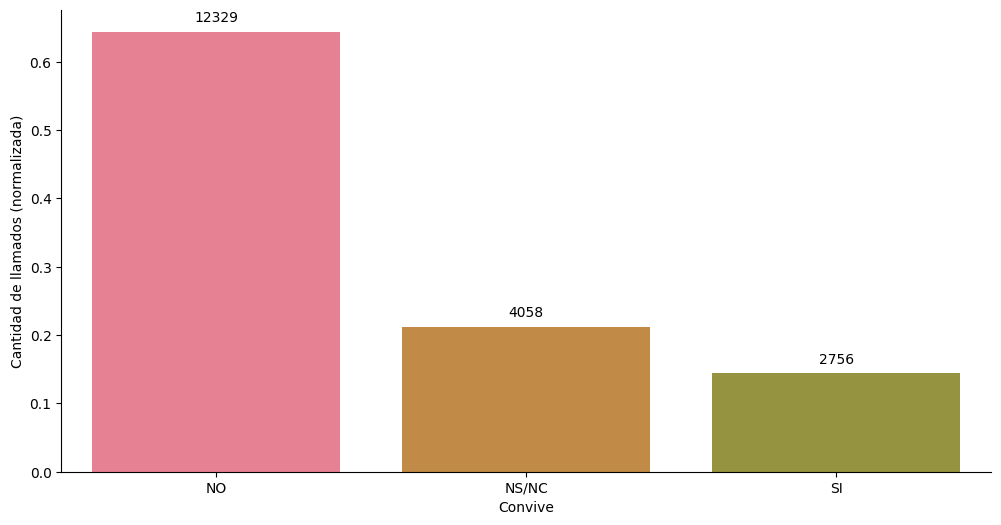

In [30]:
plt.figure(figsize=(12, 6))
plot_victima_convive_agresor = sns.barplot(
    x=llamados_v2.victima_convive_agresor.value_counts(normalize=True).index,
    y=llamados_v2.victima_convive_agresor.value_counts(normalize=True).values,
    palette=sns.color_palette("husl", 9)
)

# Anotación de las barras
for i, count in enumerate(llamados_v2.victima_convive_agresor.value_counts().values):
    plot_victima_convive_agresor.text(i, llamados_v2.victima_convive_agresor.value_counts(normalize=True).values[i] + 0.01, 
                           str(count), ha='center', va='bottom')


plot_victima_convive_agresor.set(xlabel='Convive', ylabel='Cantidad de llamados (normalizada)')

plt.xticks(rotation=0)
sns.despine()
plt.show()

### Existencia de discapacidad en la víctimas

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/965720025.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_victima_discapacidad = sns.barplot(
/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/965720025.py:2: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  plot_victima_discapacidad = sns.barplot(


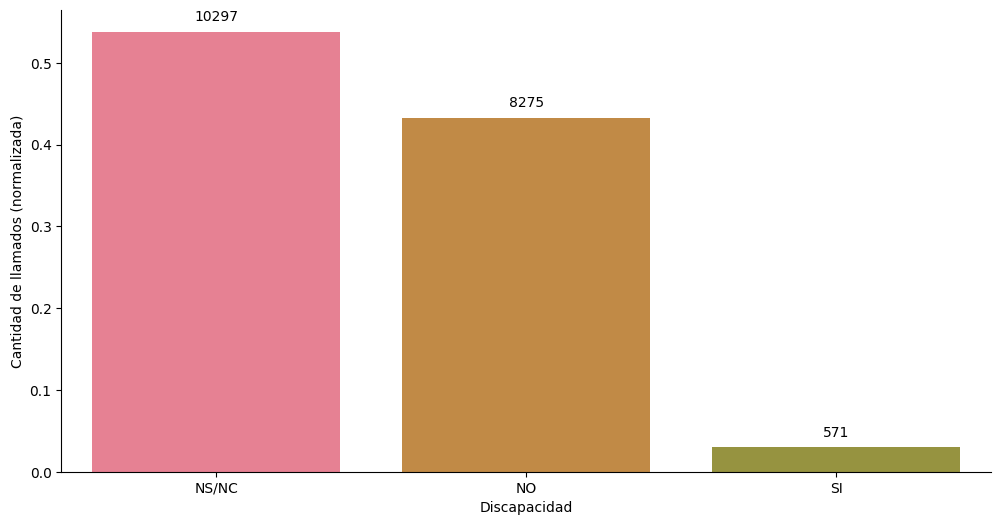

In [31]:
plt.figure(figsize=(12, 6))
plot_victima_discapacidad = sns.barplot(
    x=llamados_v2.victima_discapacidad.value_counts(normalize=True).index,
    y=llamados_v2.victima_discapacidad.value_counts(normalize=True).values,
    palette=sns.color_palette("husl", 9)
)

# Anotación de las barras
for i, count in enumerate(llamados_v2.victima_discapacidad.value_counts().values):
    plot_victima_discapacidad.text(i, llamados_v2.victima_discapacidad.value_counts(normalize=True).values[i] + 0.01, 
                           str(count), ha='center', va='bottom')


plot_victima_discapacidad.set(xlabel='Discapacidad', ylabel='Cantidad de llamados (normalizada)')

plt.xticks(rotation=0)
sns.despine()
plt.show()

In [10]:
((163+164)/19143)*100

1.7081962074909889

### Nacionalidad víctima

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/775708410.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_nacionalidad = sns.barplot(


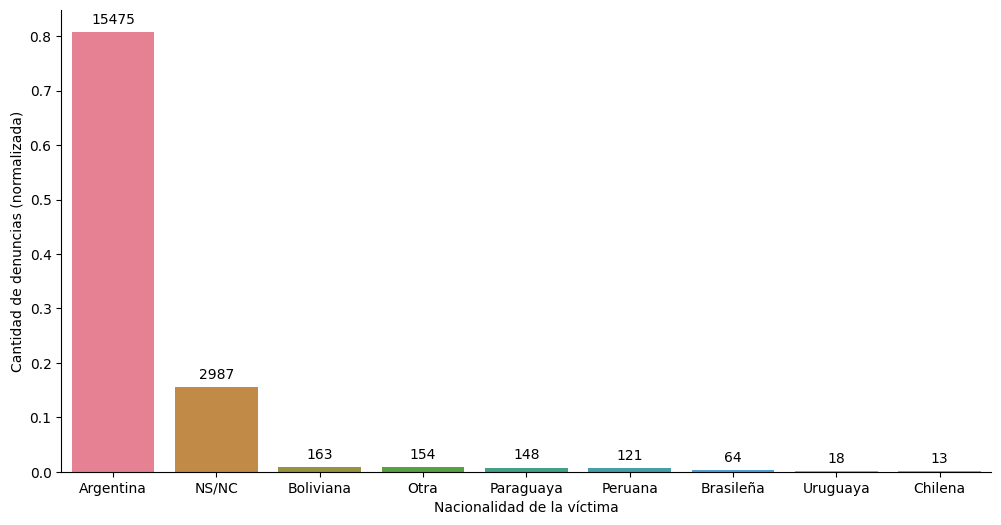

In [8]:
plt.figure(figsize=(12, 6))
plot_nacionalidad = sns.barplot(
    x=llamados_v2.victima_nacionalidad.value_counts(normalize=True).index,
    y=llamados_v2.victima_nacionalidad.value_counts(normalize=True).values,
    palette=sns.color_palette("husl", 9)
)

# Anotación de las barras
for i, count in enumerate(llamados_v2.victima_nacionalidad.value_counts().values):
    plot_nacionalidad.text(i, llamados_v2.victima_nacionalidad.value_counts(normalize=True).values[i] + 0.01, 
                           str(count), ha='center', va='bottom')


plot_nacionalidad.set(xlabel='Nacionalidad de la víctima', ylabel='Cantidad de llamados (normalizada)')

plt.xticks(rotation=0)
sns.despine()
plt.show()

### Numéricos

### Edad

In [131]:
cols_numericas = llamados_v2.iloc[:, 1:5]


In [142]:
%%capture
llamados_v2.drop(['llamado_provincia_id'], axis=1, inplace=True)

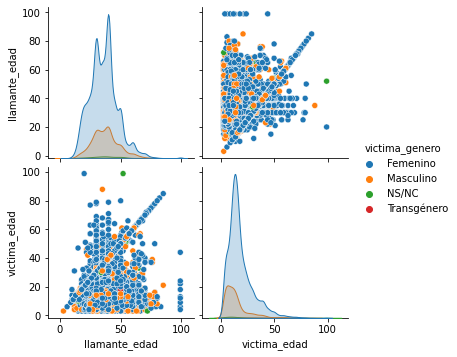

In [189]:
g = sns.pairplot(llamados_v2, hue="victima_genero")

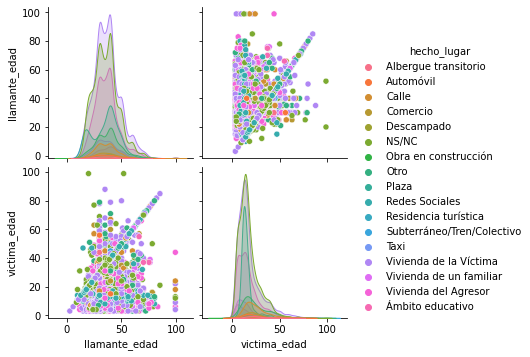

In [190]:
g = sns.pairplot(llamados_v2, hue="hecho_lugar")

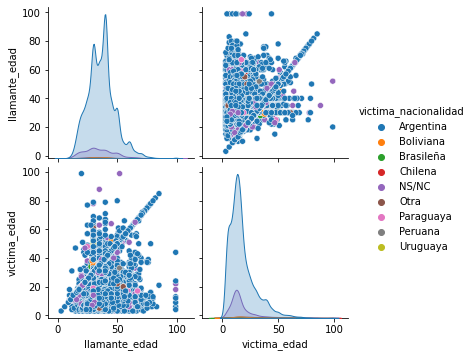

In [191]:
g = sns.pairplot(llamados_v2, hue="victima_nacionalidad")

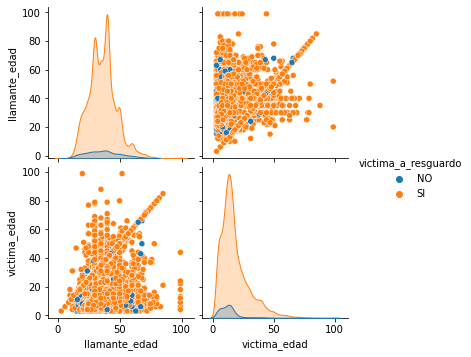

In [192]:
g = sns.pairplot(llamados_v2, hue="victima_a_resguardo")

### Construcción de variables

In [57]:
#lista_noa = ['Jujuy', 'Salta', 'Tucumán', 'Catamarca', 'La Rioja', 'Santiago del Estero']
#lista_noe=['Formosa', 'Chaco', 'Corrientes', 'Misiones']
lista_norte=['Jujuy', 'Salta', 'Tucumán', 'Catamarca', 'La Rioja', 'Santiago del Estero','Formosa', 'Chaco', 'Corrientes', 'Misiones']
#lista_cuyo=['San Luis', 'San Juan', 'Mendoza']
#lista_pampeana=['Córdoba', 'Entre Ríos','La Pampa', 'Santa Fe']
lista_centro = ['San Luis', 'San Juan', 'Mendoza','Córdoba', 'Entre Ríos','La Pampa', 'Santa Fe']
lista_patagonia=['Chubut', 'Neuquén', 'Río Negro', 'Santa Cruz', 'Tierra del Fuego']

def provincias_red(x):
    if x == 'NS/NC':
        return x
    elif x == 'CABA':
        return x
    elif x=='Buenos Aires':
        return x
    elif x in lista_norte:
        return 'Región Norte'
    elif x in lista_centro:
        return 'Región Central'
    elif x in lista_patagonia:
        return 'Región Patagónica'
    else:
        return 'N/A'

llamados_v2['llamado_provincia_red'] = \
    llamados_v2.llamado_provincia.apply(provincias_red)

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_22313/2727888724.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_genero_agresor = sns.catplot(x="llamado_provincia_red", kind="count", data=llamados_v2, height=6, aspect=2, order=llamados_v2.llamado_provincia_red.value_counts().index, palette=sns.color_palette("husl",6))


<function matplotlib.pyplot.show(close=None, block=None)>

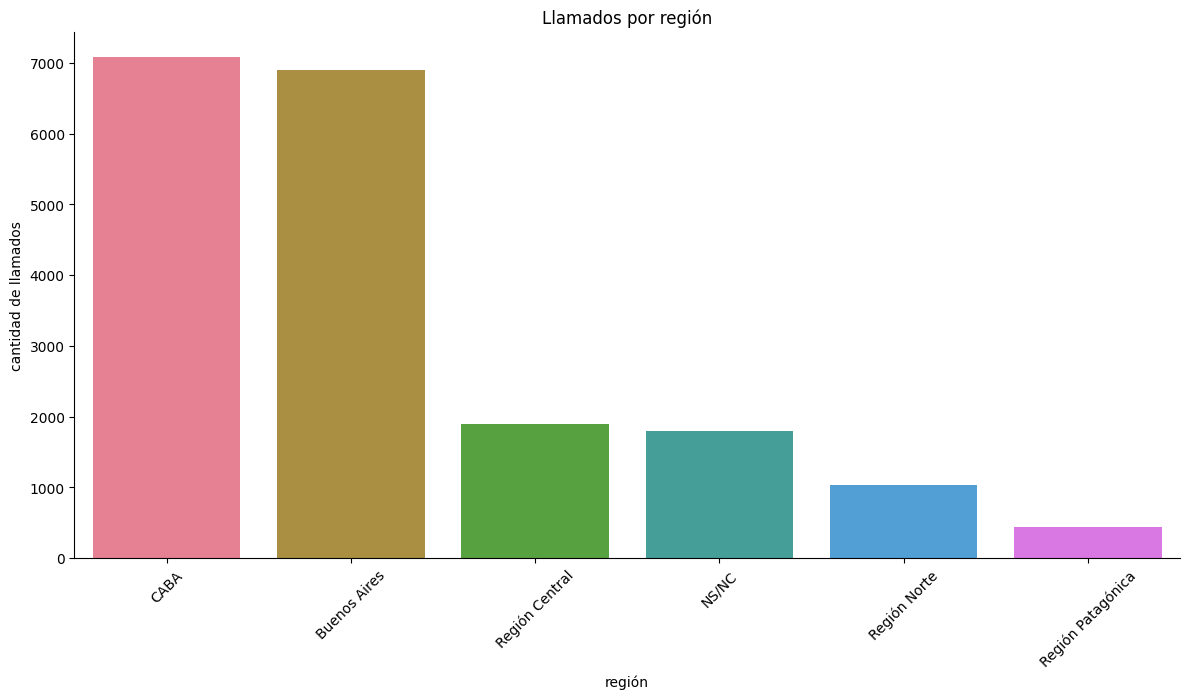

In [58]:
plot_genero_agresor = sns.catplot(x="llamado_provincia_red", kind="count", data=llamados_v2, height=6, aspect=2, order=llamados_v2.llamado_provincia_red.value_counts().index, palette=sns.color_palette("husl",6))
plot_genero_agresor.set(xlabel='región', ylabel='cantidad de llamados')
plt.title("Llamados por región") 
plt.xticks(rotation=45)
plt.show

### Género agresor

In [48]:
# género dell agresor
lista_hombre = [ 'Abuelo', 'Hermano', 'Padrastro', 'Padre', 'Tío' ]
lista_mujer = [ 'Abuela','Hermana','Madrastra', 'Madre']
lista_no_especificado_pareja_ex = ['Ex pareja de la víctima','Pareja de la víctima']
lista_no_especificado_familiar_conocido= [ 'Otro pariente','Conocido no familiar (Amigo, vecino, entre otros)']
lista_no_especificado_desconocido = [ 'Desconocido']

def columna_genero_agresor (x):
    if x in lista_mujer:
        return 'Femenino'
    elif x in lista_hombre:
        return 'Masculino'
    elif x in lista_no_especificado_pareja_ex:
        return 'No especificado - agresor pareja/ex pareja'
    elif x in lista_no_especificado_familiar_conocido:
        return 'No especificado - agresor conocido'
    elif x in lista_no_especificado_desconocido:
        return 'No especificado - agresor desconocido'
    elif x == 'NS/NC':
        return x
    else:
        return 'N/A'

In [49]:
llamados_v2['genero_agresor'] = \
    llamados_v2.victima_vinculo_agresor.apply(columna_genero_agresor)

### Género del agresor

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_22313/2079800149.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_genero_agresor = sns.catplot(x="genero_agresor", kind="count", data=llamados_v2, height=6, aspect=2, order=llamados_v2.genero_agresor.value_counts().index, palette=sns.color_palette("husl",6))


<function matplotlib.pyplot.show(close=None, block=None)>

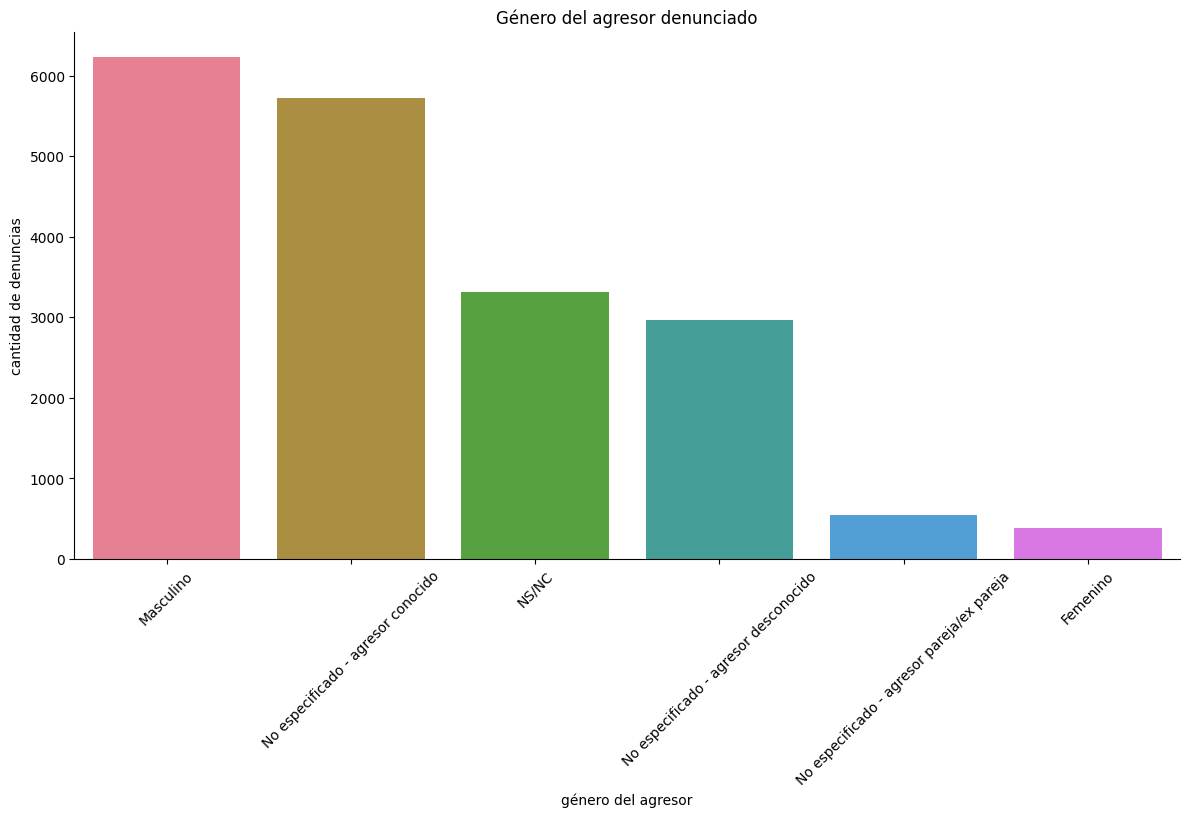

In [51]:
plot_genero_agresor = sns.catplot(x="genero_agresor", kind="count", data=llamados_v2, height=6, aspect=2, order=llamados_v2.genero_agresor.value_counts().index, palette=sns.color_palette("husl",6))
plot_genero_agresor.set(xlabel='género del agresor', ylabel='cantidad de denuncias')
plt.title("Género del agresor denunciado") 
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

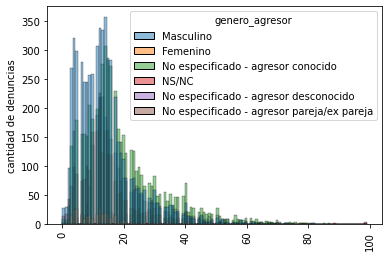

In [28]:
plot_edad = sns.histplot(x="victima_edad", data=llamados_v2, hue='genero_agresor')
plot_edad.set(xlabel= '', ylabel='cantidad de denuncias')
plt.title("") 
plt.xticks(rotation=90)
plt.show

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/832214994.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_victima_vinculo_agresor = sns.barplot(
/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/832214994.py:2: UserWarning: 
The palette list has fewer values (9) than needed (15) and will cycle, which may produce an uninterpretable plot.
  plot_victima_vinculo_agresor = sns.barplot(


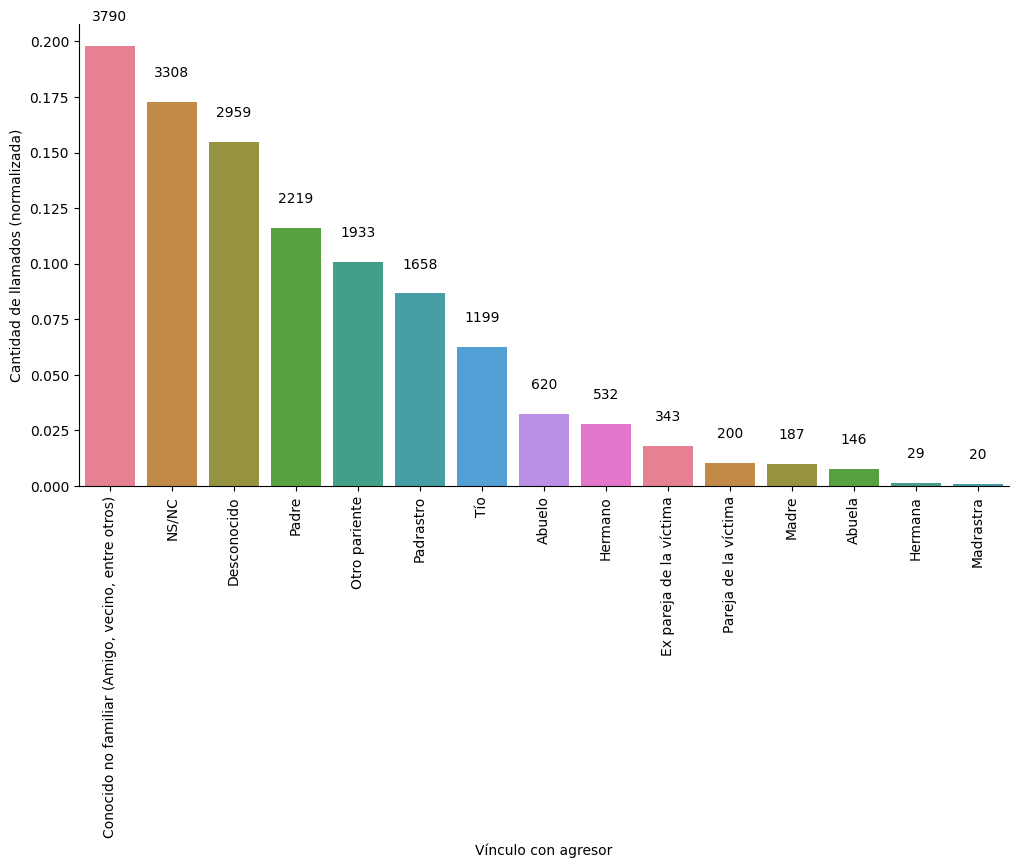

In [33]:
plt.figure(figsize=(12, 6))
plot_victima_vinculo_agresor = sns.barplot(
    x=llamados_v2.victima_vinculo_agresor.value_counts(normalize=True).index,
    y=llamados_v2.victima_vinculo_agresor.value_counts(normalize=True).values,
    palette=sns.color_palette("husl", 9)
)

# Anotación de las barras
for i, count in enumerate(llamados_v2.victima_vinculo_agresor.value_counts().values):
    plot_victima_vinculo_agresor.text(i, llamados_v2.victima_vinculo_agresor.value_counts(normalize=True).values[i] + 0.01, 
                           str(count), ha='center', va='bottom')


plot_victima_vinculo_agresor.set(xlabel='Vínculo con agresor', ylabel='Cantidad de llamados (normalizada)')

plt.xticks(rotation=90)
sns.despine()
plt.show()

### Familiar/No familiar

In [52]:
lista_familiar = ['Abuela', 'Abuelo', 'Hermana', 'Hermano', 'Madrastra', 'Madre', 'Otro pariente', 'Padrastro', 'Padre', 'Tío' ]
lista_no_familiar = ['Desconocido', 'Conocido no familiar (Amigo, vecino, entre otros)']
lista_pareja_exp = ['Pareja de la víctima', 'Ex pareja de la víctima']

def columna_fam_nofam (x):
    if x in lista_familiar:
        return 'Familiar'
    elif x in lista_no_familiar:
        return 'No Familiar'
    elif x in lista_pareja_exp:
        return 'Pareja/Ex'
    elif x == 'NS/NC':
        return x
    else:
        return 'N/A'

In [53]:
llamados_v2['agresor_fam_no_fam'] = \
    llamados_v2.victima_vinculo_agresor.apply(columna_fam_nofam)

### Vínculos agresor - víctima

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_22313/139891961.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_vinculo_agr = sns.catplot(x="agresor_fam_no_fam", kind="count", data=llamados_v2, height=6, aspect=2, palette=sns.color_palette("husl",4))


<function matplotlib.pyplot.show(close=None, block=None)>

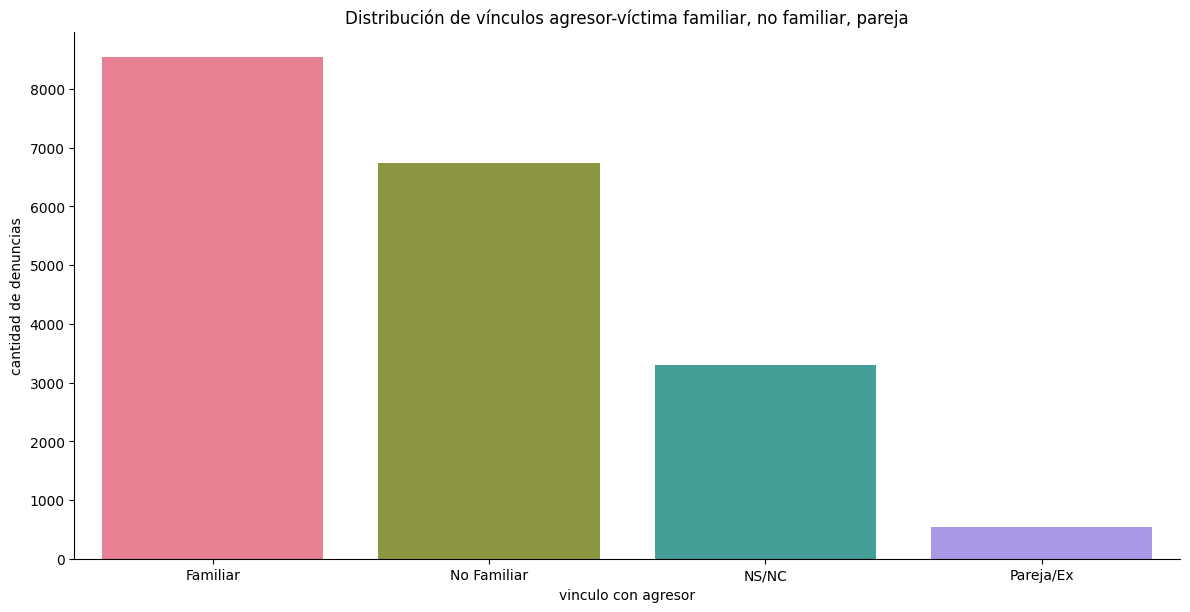

In [54]:
plot_vinculo_agr = sns.catplot(x="agresor_fam_no_fam", kind="count", data=llamados_v2, height=6, aspect=2, palette=sns.color_palette("husl",4))
plot_vinculo_agr.set(xlabel='vinculo con agresor', ylabel='cantidad de denuncias')
plt.title("Distribución de vínculos agresor-víctima familiar, no familiar, pareja") 
plt.xticks(rotation=0)
plt.show

In [39]:
lista_conocido_familiar = ['Abuela', 'Abuelo','Pareja de la víctima', 'Ex pareja de la víctima', 'Hermana', 'Hermano', 'Madrastra', 'Madre', 'Otro pariente', 'Padrastro', 'Padre', 'Tío' ]
lista_no_conocido = ['Desconocido', ]
lista_no_declarado = ['NS/NC']

def conocido_no_conocido (x):
    if x in lista_conocido_familiar:
        return 'Agresor conocido (familiar))'
    elif x == 'Desconocido':
        return x
    elif x in lista_no_declarado:
        return 'NS/NC'
    elif x == 'Conocido no familiar':
        return x
    else:
        return 'N/A'

llamados_v2['agresor_conocido_no_conocido'] = \
    llamados_v2.victima_vinculo_agresor.apply(conocido_no_conocido)

### Conocimiento o no del agresor

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/2665237222.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_victima_agresor_conocido_no = sns.barplot(
/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/2665237222.py:2: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  plot_victima_agresor_conocido_no = sns.barplot(


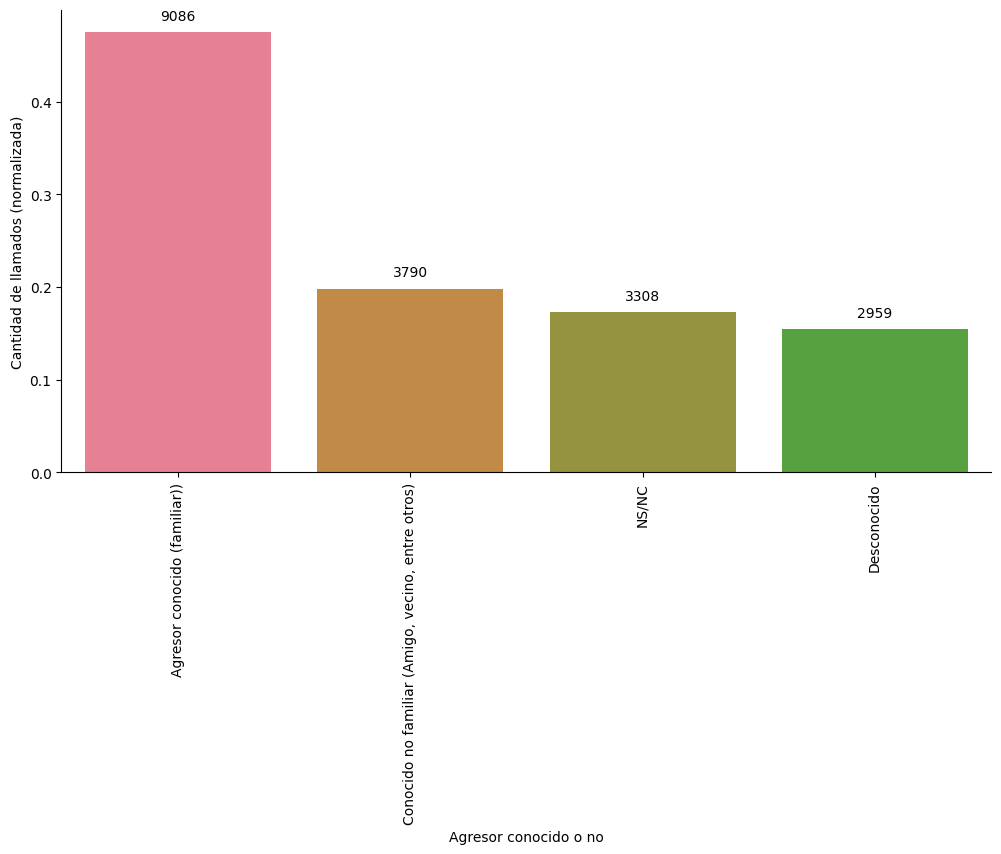

In [36]:
plt.figure(figsize=(12, 6))
plot_victima_agresor_conocido_no = sns.barplot(
    x=llamados_v2.agresor_conocido_no_conocido.value_counts(normalize=True).index,
    y=llamados_v2.agresor_conocido_no_conocido.value_counts(normalize=True).values,
    palette=sns.color_palette("husl", 9)
)

# Anotación de las barras
for i, count in enumerate(llamados_v2.agresor_conocido_no_conocido.value_counts().values):
    plot_victima_agresor_conocido_no.text(i, llamados_v2.agresor_conocido_no_conocido.value_counts(normalize=True).values[i] + 0.01, 
                           str(count), ha='center', va='bottom')


plot_victima_agresor_conocido_no.set(xlabel='Agresor conocido o no', ylabel='Cantidad de llamados (normalizada)')

plt.xticks(rotation=90)
sns.despine()
plt.show()

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/2604217344.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/2604217344.py:27: UserWarning: 
The palette list has fewer values (9) than needed (25) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/2604217344.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90 if variable != 'victima_nacionalidad' else 0)
/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/2604217344.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0

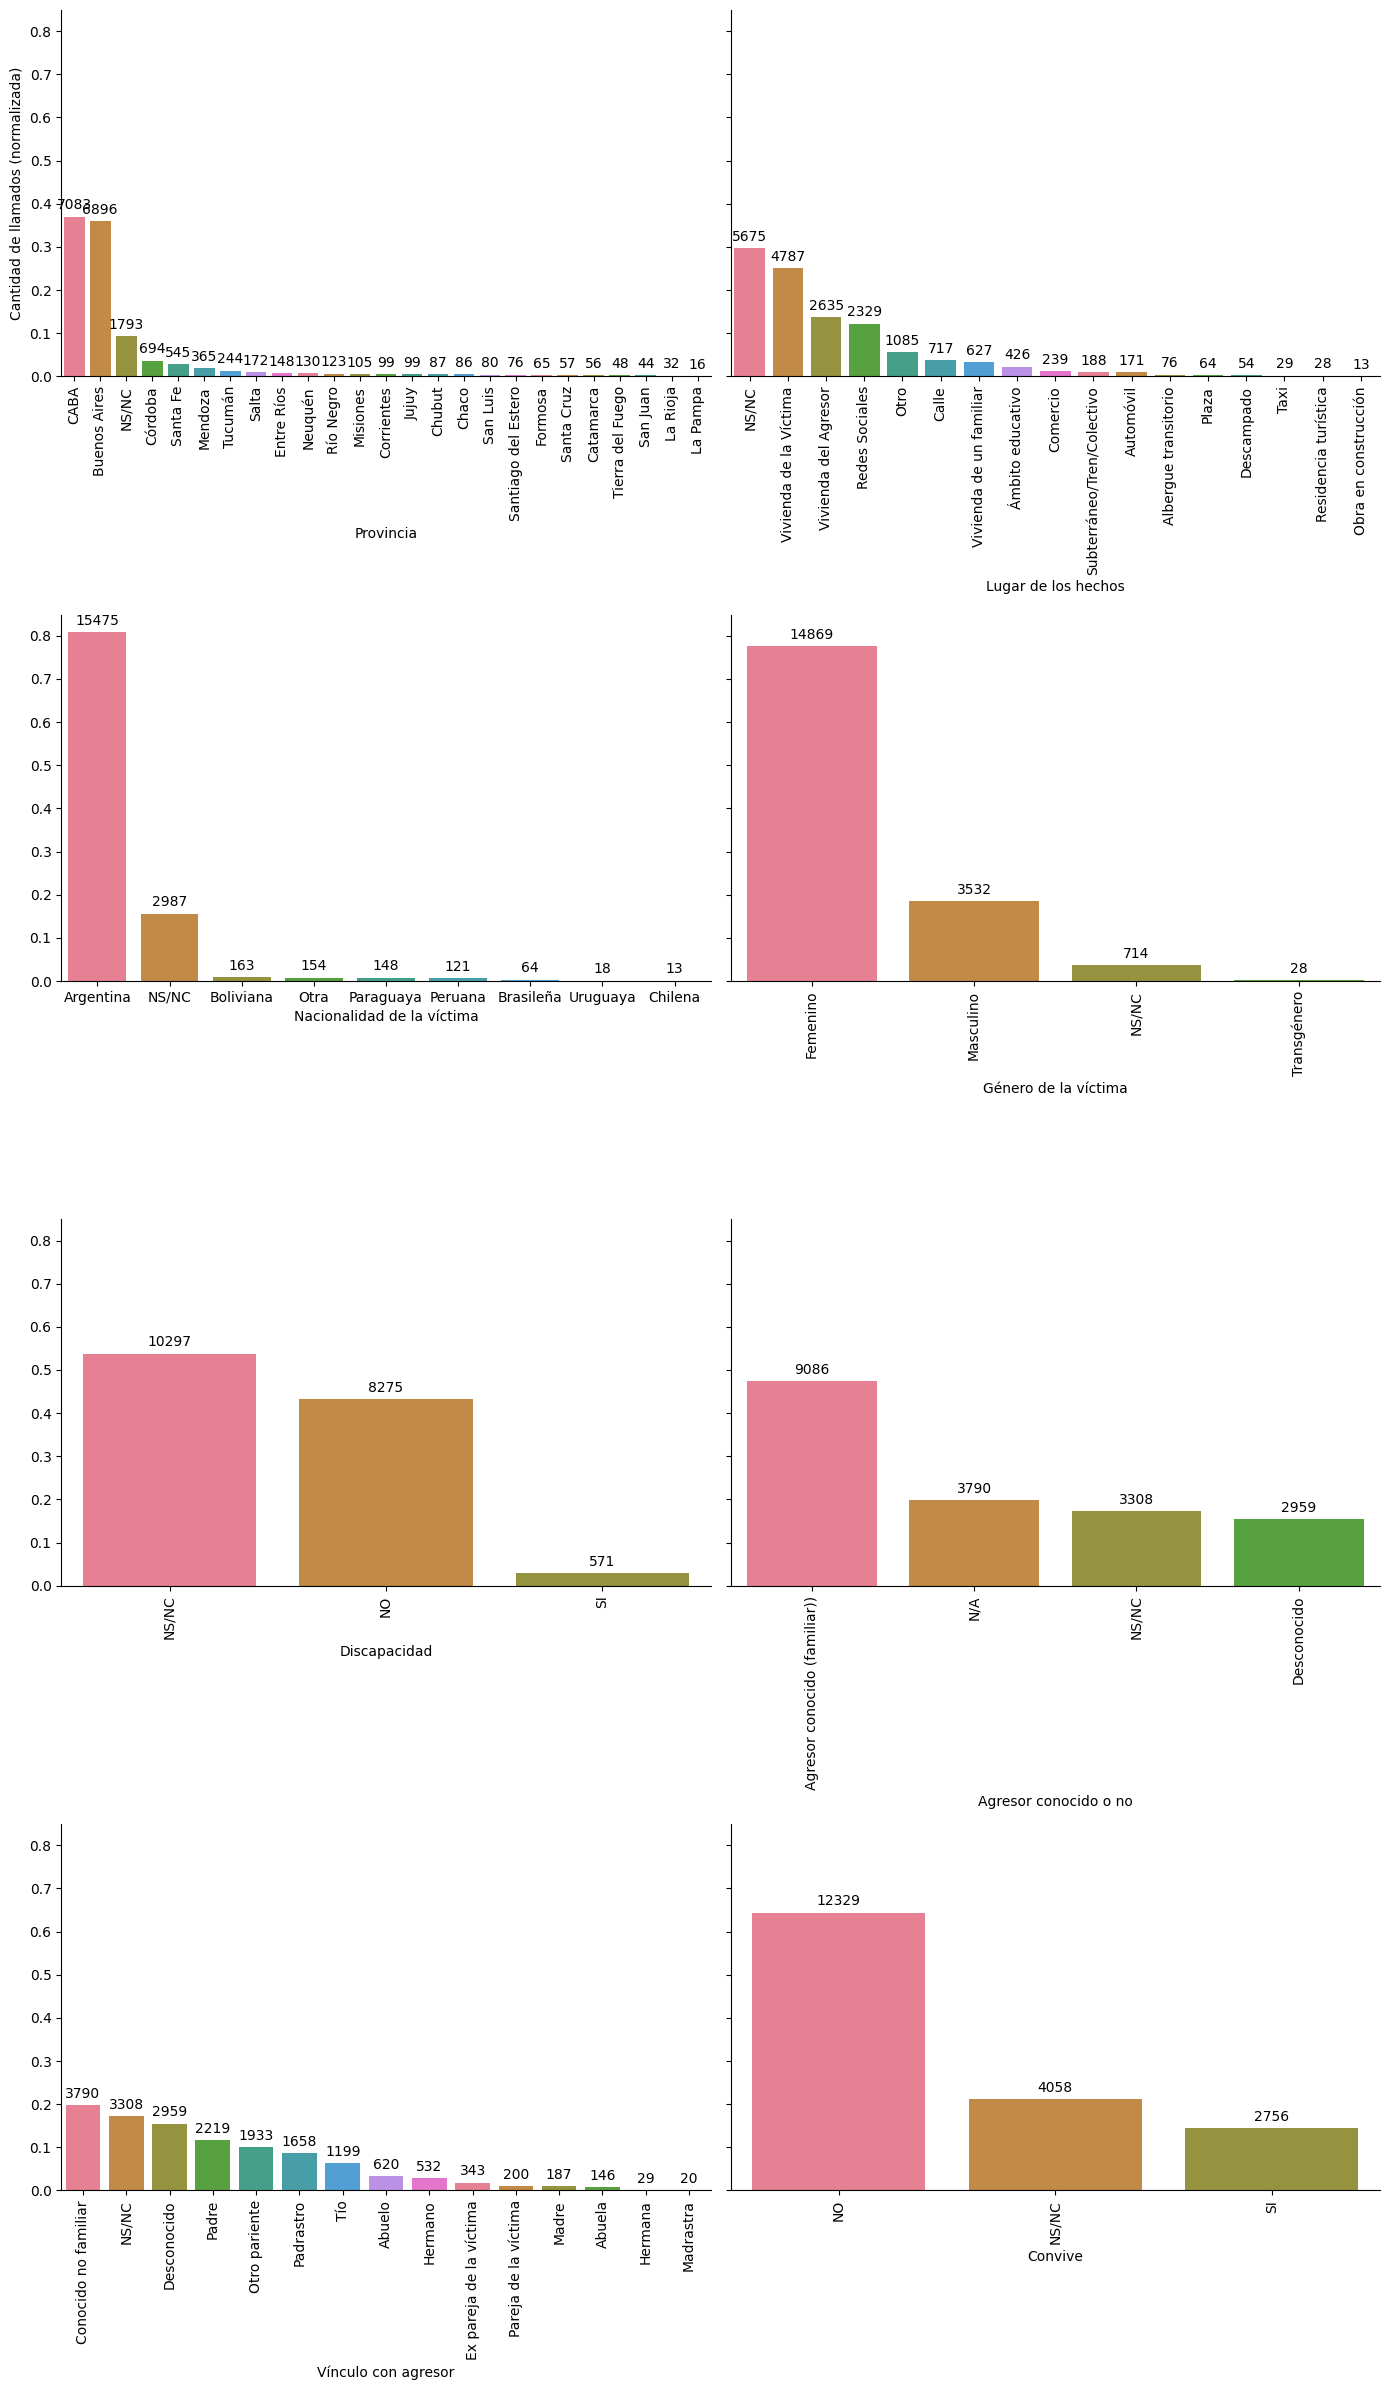

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust the figsize for a 4x2 grid (four rows, two columns)
fig, axes = plt.subplots(4, 2, figsize=(14, 24), sharey=True)

# Replace the long category name in 'victima_vinculo_agresor'
llamados_v2['victima_vinculo_agresor'] = llamados_v2['victima_vinculo_agresor'].replace(
    'Conocido no familiar (Amigo, vecino, entre otros)', 'Conocido no familiar'
)

# List of variables and their corresponding titles
variables = [
    ('llamado_provincia', 'Provincia'),
    ('hecho_lugar', 'Lugar de los hechos'),
    ('victima_nacionalidad', 'Nacionalidad de la víctima'),
    ('victima_genero', 'Género de la víctima'),
    ('victima_discapacidad', 'Discapacidad'),
    ('agresor_conocido_no_conocido', 'Agresor conocido o no'),
    ('victima_vinculo_agresor', 'Vínculo con agresor'),
    ('victima_convive_agresor', 'Convive')
]

# Loop through the variables and corresponding axes
for ax, (variable, title) in zip(axes.flatten(), variables):
    # Create the barplot
    sns.barplot(
        x=llamados_v2[variable].value_counts(normalize=True).index,
        y=llamados_v2[variable].value_counts(normalize=True).values,
        palette=sns.color_palette("husl", 9),
        ax=ax
    )

    # Annotate the bars with actual counts
    for i, count in enumerate(llamados_v2[variable].value_counts().values):
        ax.text(i, llamados_v2[variable].value_counts(normalize=True).values[i] + 0.01,
                str(count), ha='center', va='bottom')

    # Set axis labels and title
    ax.set(xlabel=title, ylabel='Cantidad de llamados (normalizada)' if ax == axes[0, 0] else '')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90 if variable != 'victima_nacionalidad' else 0)

    # Remove the top and right spines
    sns.despine(ax=ax)

# Adjust layout
plt.tight_layout()
plt.show()



